# Importing Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
path= 'iBeacon_RSSI_Labeled.csv'
data = pd.read_csv(path, index_col=None)
data.head(5)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


# Data cleaning-preparation

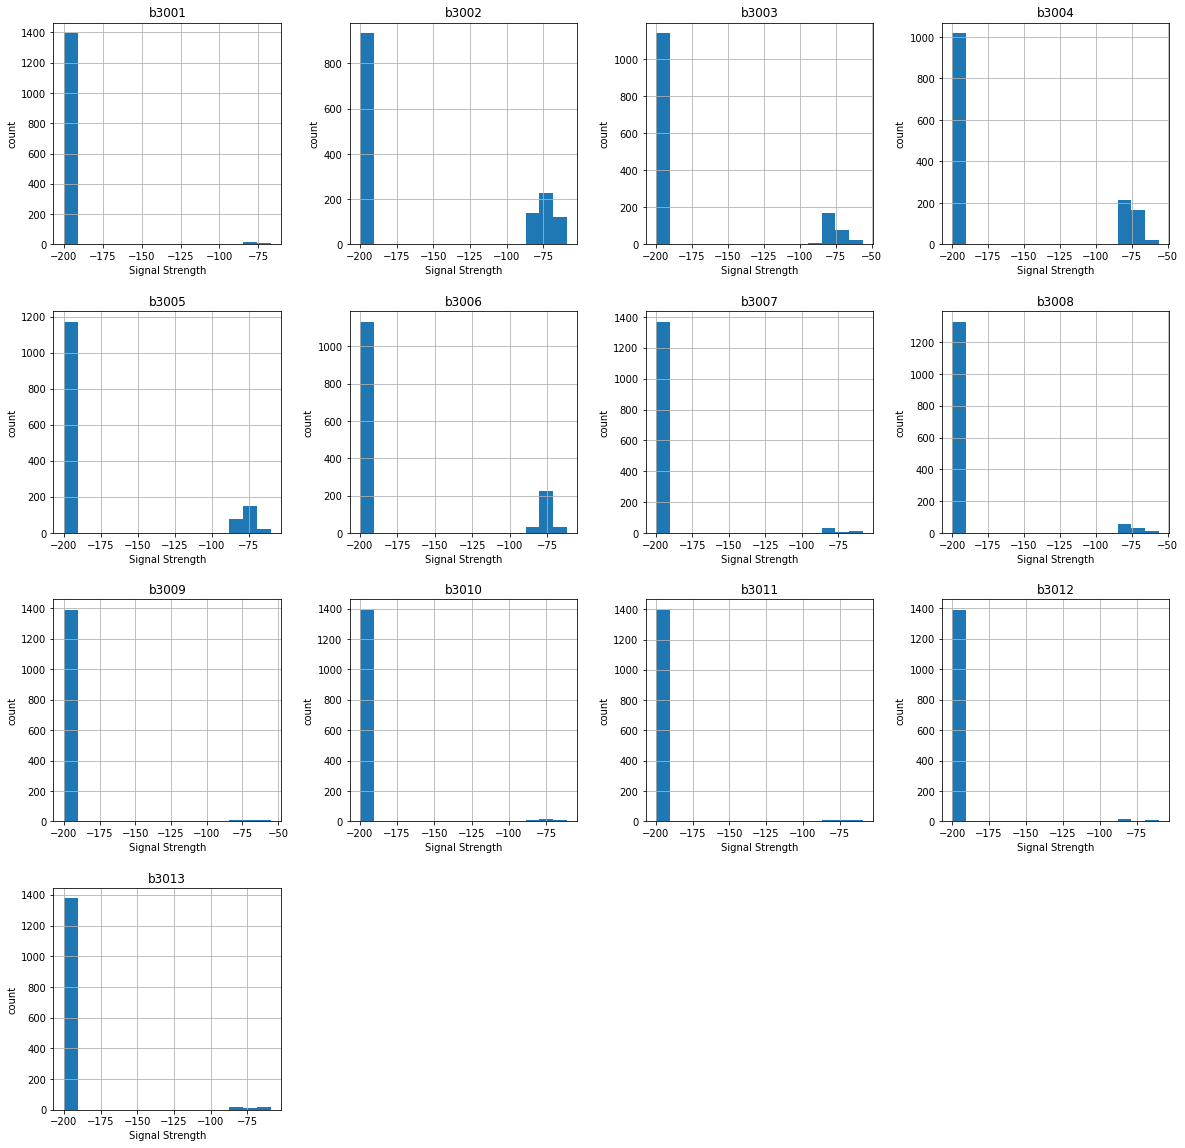

In [3]:
plots = data.hist(bins=15, figsize=(20,20))

for ax in plots.flatten():
    ax.set_xlabel("Signal Strength")
    ax.set_ylabel("count")

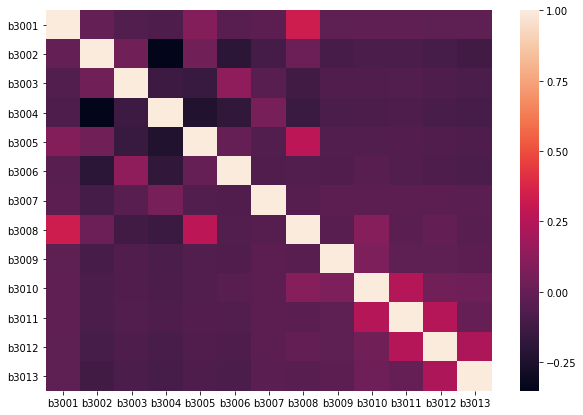

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(method='kendall'), ax=ax)

In [5]:
data.max()

location                   W15
date        9-27-2016 12:38:58
b3001                      -67
b3002                      -59
b3003                      -56
b3004                      -56
b3005                      -60
b3006                      -62
b3007                      -58
b3008                      -56
b3009                      -55
b3010                      -61
b3011                      -59
b3012                      -60
b3013                      -59
dtype: object

In [6]:
label = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
for col in data.select_dtypes(include="number").columns:
    data[col] = pd.cut(data[col], bins = 15, labels = label)

# Splitting the location:
data['x'] = data['location'].str[0]
data['y'] = data['location'].str[1:]

# Label Encoding
from sklearn.preprocessing import LabelEncoder
data['x'] = LabelEncoder().fit_transform(data['x'])
data['y'] = LabelEncoder().fit_transform(data['y'])

# Dropping the columns
data = data.drop(columns=["date","location"])

data.head(5)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,x,y
0,1,1,1,1,1,14,1,1,1,1,1,1,1,10,1
1,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0
2,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0
3,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0
4,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0


In [7]:
data = pd.get_dummies(data, columns=data.columns[0:-2])
data.head(5)

,x,y,b3001_1,b3001_2,b3001_3,b3001_4,b3001_5,b3001_6,b3001_7,b3001_8,b3001_9,b3001_10,b3001_11,b3001_12,b3001_13,b3001_14,b3001_15,b3002_1,b3002_2,b3002_3,b3002_4,b3002_5,b3002_6,b3002_7,b3002_8,b3002_9,b3002_10,b3002_11,b3002_12,b3002_13,b3002_14,b3002_15,b3003_1,b3003_2,b3003_3,b3003_4,b3003_5,b3003_6,b3003_7,b3003_8,b3003_9,b3003_10,b3003_11,b3003_12,b3003_13,b3003_14,b3003_15,b3004_1,b3004_2,b3004_3,b3004_4,b3004_5,b3004_6,b3004_7,b3004_8,b3004_9,b3004_10,b3004_11,b3004_12,b3004_13,b3004_14,b3004_15,b3005_1,b3005_2,b3005_3,b3005_4,b3005_5,b3005_6,b3005_7,b3005_8,b3005_9,b3005_10,b3005_11,b3005_12,b3005_13,b3005_14,b3005_15,b3006_1,b3006_2,b3006_3,b3006_4,b3006_5,b3006_6,b3006_7,b3006_8,b3006_9,b3006_10,b3006_11,b3006_12,b3006_13,b3006_14,b3006_15,b3007_1,b3007_2,b3007_3,b3007_4,b3007_5,b3007_6,b3007_7,b3007_8,b3007_9,b3007_10,b3007_11,b3007_12,b3007_13,b3007_14,b3007_15,b3008_1,b3008_2,b3008_3,b3008_4,b3008_5,b3008_6,b3008_7,b3008_8,b3008_9,b3008_10,b3008_11,b3008_12,b3008_13,b3008_14,b3008_15,b3009_1,b3009_2,b3009_3,b3009_4,b3009_5,b3009_6,b3009_7,b3009_8,b3009_9,b3009_10,b3009_11,b3009_12,b3009_13,b3009_14,b3009_15,b3010_1,b3010_2,b3010_3,b3010_4,b3010_5,b3010_6,b3010_7,b3010_8,b3010_9,b3010_10,b3010_11,b3010_12,b3010_13,b3010_14,b3010_15,b3011_1,b3011_2,b3011_3,b3011_4,b3011_5,b3011_6,b3011_7,b3011_8,b3011_9,b3011_10,b3011_11,b3011_12,b3011_13,b3011_14,b3011_15,b3012_1,b3012_2,b3012_3,b3012_4,b3012_5,b3012_6,b3012_7,b3012_8,b3012_9,b3012_10,b3012_11,b3012_12,b3012_13,b3012_14,b3012_15,b3013_1,b3013_2,b3013_3,b3013_4,b3013_5,b3013_6,b3013_7,b3013_8,b3013_9,b3013_10,b3013_11,b3013_12,b3013_13,b3013_14,b3013_15
0,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
target_x = data['x']
target_y = data['y']
data.drop(columns=['x','y'], inplace=True)
data.head(5)

,b3001_1,b3001_2,b3001_3,b3001_4,b3001_5,b3001_6,b3001_7,b3001_8,b3001_9,b3001_10,b3001_11,b3001_12,b3001_13,b3001_14,b3001_15,b3002_1,b3002_2,b3002_3,b3002_4,b3002_5,b3002_6,b3002_7,b3002_8,b3002_9,b3002_10,b3002_11,b3002_12,b3002_13,b3002_14,b3002_15,b3003_1,b3003_2,b3003_3,b3003_4,b3003_5,b3003_6,b3003_7,b3003_8,b3003_9,b3003_10,b3003_11,b3003_12,b3003_13,b3003_14,b3003_15,b3004_1,b3004_2,b3004_3,b3004_4,b3004_5,b3004_6,b3004_7,b3004_8,b3004_9,b3004_10,b3004_11,b3004_12,b3004_13,b3004_14,b3004_15,b3005_1,b3005_2,b3005_3,b3005_4,b3005_5,b3005_6,b3005_7,b3005_8,b3005_9,b3005_10,b3005_11,b3005_12,b3005_13,b3005_14,b3005_15,b3006_1,b3006_2,b3006_3,b3006_4,b3006_5,b3006_6,b3006_7,b3006_8,b3006_9,b3006_10,b3006_11,b3006_12,b3006_13,b3006_14,b3006_15,b3007_1,b3007_2,b3007_3,b3007_4,b3007_5,b3007_6,b3007_7,b3007_8,b3007_9,b3007_10,b3007_11,b3007_12,b3007_13,b3007_14,b3007_15,b3008_1,b3008_2,b3008_3,b3008_4,b3008_5,b3008_6,b3008_7,b3008_8,b3008_9,b3008_10,b3008_11,b3008_12,b3008_13,b3008_14,b3008_15,b3009_1,b3009_2,b3009_3,b3009_4,b3009_5,b3009_6,b3009_7,b3009_8,b3009_9,b3009_10,b3009_11,b3009_12,b3009_13,b3009_14,b3009_15,b3010_1,b3010_2,b3010_3,b3010_4,b3010_5,b3010_6,b3010_7,b3010_8,b3010_9,b3010_10,b3010_11,b3010_12,b3010_13,b3010_14,b3010_15,b3011_1,b3011_2,b3011_3,b3011_4,b3011_5,b3011_6,b3011_7,b3011_8,b3011_9,b3011_10,b3011_11,b3011_12,b3011_13,b3011_14,b3011_15,b3012_1,b3012_2,b3012_3,b3012_4,b3012_5,b3012_6,b3012_7,b3012_8,b3012_9,b3012_10,b3012_11,b3012_12,b3012_13,b3012_14,b3012_15,b3013_1,b3013_2,b3013_3,b3013_4,b3013_5,b3013_6,b3013_7,b3013_8,b3013_9,b3013_10,b3013_11,b3013_12,b3013_13,b3013_14,b3013_15
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modelling

In [9]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train_x, t_test_x = train_test_split(data,
                                                    target_x,
                                                    test_size = 0.3,
                                                    random_state=999)

D_train, D_test, t_train_y, t_test_y = train_test_split(data,
                                                    target_y,
                                                    test_size = 0.3,
                                                    random_state=999)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

k_fold_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=8)

################################## KNN #####################################################

parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15],
              'p': [1, 2, 5]}

knn = KNeighborsClassifier()

gs_knn_x = GridSearchCV(estimator=knn,
                      param_grid=parameters_knn,
                      cv=k_fold_method,
                      verbose=1,
                      n_jobs=-2,
                      scoring='accuracy',
                      return_train_score=True)

gs_knn_y = GridSearchCV(estimator=knn,
                      param_grid=parameters_knn,
                      cv=k_fold_method,
                      verbose=1,
                      n_jobs=-2,
                      scoring='accuracy',
                      return_train_score=True)

################################### DT ########################################################

parameters_dt = {'criterion':['gini','entropy'],'max_depth':[2,3,4]}

dt = DecisionTreeClassifier()

gs_dt_y = GridSearchCV(estimator=dt,
                    param_grid=parameters_dt,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

gs_dt_x = GridSearchCV(estimator=dt,
                    param_grid=parameters_dt,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)


####################################### SVC ####################################################

parameters_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svc = SVC()

gs_svc_x = GridSearchCV(estimator=svc,
                    param_grid=parameters_svc,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

gs_svc_y = GridSearchCV(estimator=svc,
                    param_grid=parameters_svc,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

In [11]:
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


gs_dt_y.fit(D_train, t_train_y)
gs_dt_x.fit(D_train, t_train_x)

gs_knn_y.fit(D_train, t_train_y)
gs_knn_x.fit(D_train, t_train_x)

gs_svc_y.fit(D_train, t_train_y)
gs_svc_x.fit(D_train, t_train_x)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-2)]

Fitting 15 folds for each of 6 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:    0.1s finished
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_select

Fitting 15 folds for each of 45 candidates, totalling 675 fits


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-2)]: Done 675 out of 675 | elapsed:   50.2s finished
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too fe

Fitting 15 folds for each of 45 candidates, totalling 675 fits


[Parallel(n_jobs=-2)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 219 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-2)]: Done 469 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-2)]: Done 675 out of 675 | elapsed:   60.0s finished
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too fe

Fitting 15 folds for each of 25 candidates, totalling 375 fits


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-2)]: Done 375 out of 375 | elapsed:   21.9s finished


Fitting 15 folds for each of 25 candidates, totalling 375 fits


C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\G15\Anaconda3\mmm\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-2)]

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x00000212358A6630>,
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [12]:
#function to return an array with distances between the actual and predicted points
def distance(x_actual, y_actual, x_predicted, y_predicted):
    d_x = x_actual - x_predicted
    d_y = y_actual - y_predicted
    dist = d_x**2 + d_y**2
    dist = np.sqrt(dist)
    #dist = np.sort(dist)
    return dist

In [15]:
models_predictions_x = {'KNN_x': gs_knn_x.predict(D_test), 'DT_x': gs_dt_x.predict(D_test), 'SVC_x': gs_svc_x.predict(D_test)}

models_predictions_y = {'KNN_y': gs_knn_y.predict(D_test), 'DT_y': gs_dt_y.predict(D_test), 'SVC_y': gs_svc_y.predict(D_test)}

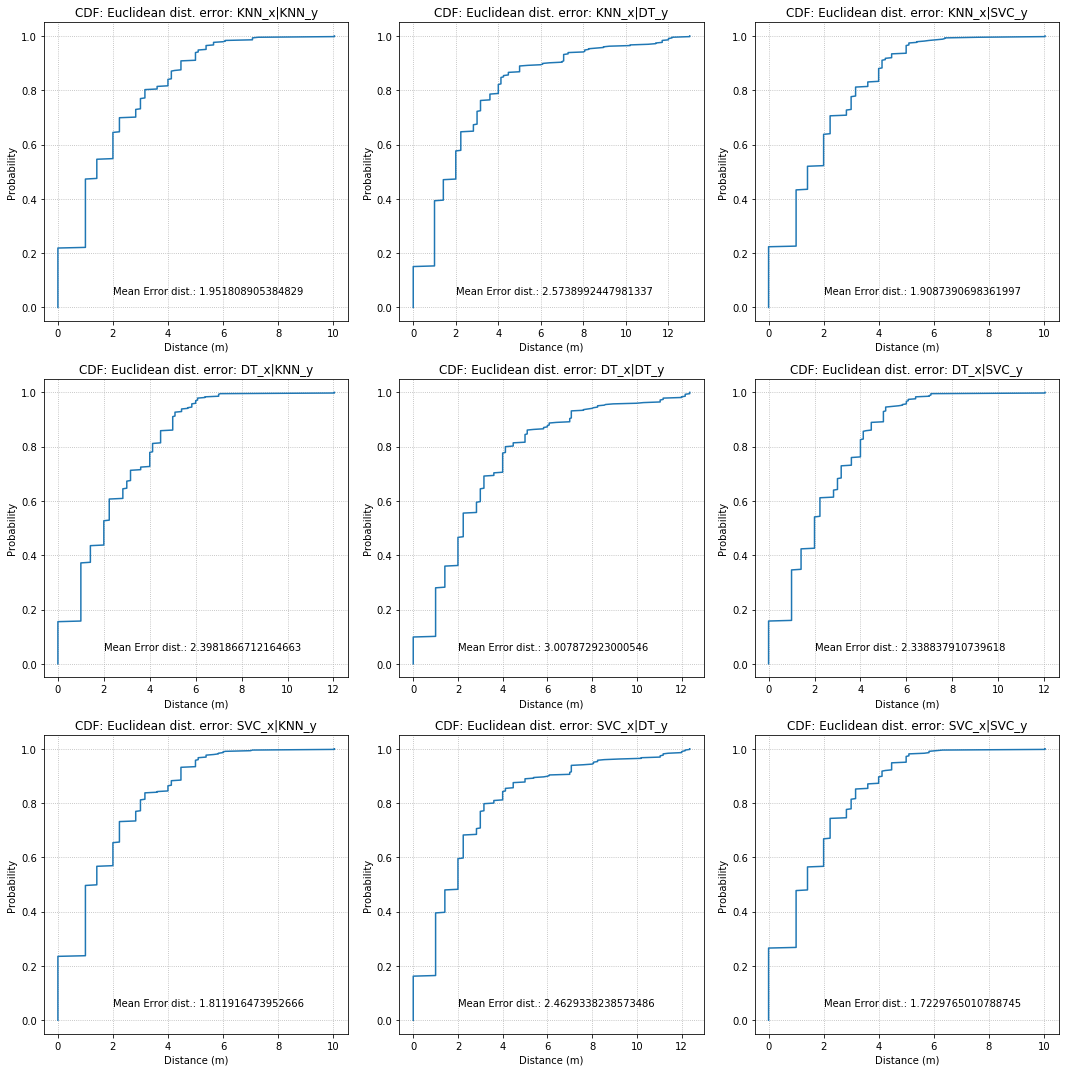

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs

for ax, px in zip(axs,models_predictions_x):
    for axes, py in zip(ax,models_predictions_y):
        distances = distance(t_test_x, t_test_y, models_predictions_x[px], models_predictions_y[py])
        sorted_distances = np.sort(distances)
        probabilites = 1. * np.arange(len(sorted_distances))/(len(sorted_distances) - 1)
        axes.plot(sorted_distances, probabilites)
        axes.set_title(f'CDF: Euclidean dist. error: {px}|{py}')
        axes.set(xlabel = 'Distance (m)', ylabel = 'Probability')
        axes.text(2,0.05,f"Mean Error dist.: {np.mean(distances)}")
        axes.grid(True)
        gridlines = axes.get_xgridlines() + axes.get_ygridlines()
        for line in gridlines:
            line.set_linestyle(':')

fig.tight_layout()
plt.show()
plt.close()